# Raport - Eksploracja Danych
# Temat 2 - "Określanie poziomu zarobków"


Przygotowali: Agnieszka Alechno i Igor Bastek



Przekazana nam do analizy baza danych zawiera wiele szczegółowych informacji, 
które pozwolą na wyliczenie jakie jest prawdopodobieństwo, iż dana osoba zarabia 
powyżej 50 tysięcy dolarów rocznie.

Zacznjmy od wczytania bazy z pliku do macierzy, aby móc się jej lepiej przyjrzeć:

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
data = pd.read_table('adult.csv',sep=',')
data.head(2)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K


Niektóre z atrybutów oznaczono jako '?'. Sprawdźmy jak wiele luk ma zatem baza danych.

In [3]:
blankCounter =0
print(data['workclass'][13])
for i in range(0, len(data)):#workclass,occupation, country
    if data['age'][i] =='?' or data['workclass'][i] =='?' or data['fnlwgt'][i] =='?' or data['education'][i] =='?' or data['education.num'][i] =='?' or data['marital.status'][i] =='?' or data['occupation'][i] =='?' or data['relationship'][i] =='?'  or data['race'][i] =='?' or data['sex'][i] =='?' or data['capital.gain'][i] =='?'or data['capital.loss'][i] =='?' or data['hours.per.week'][i] =='?' or data['native.country'][i] =='?':
        blankCounter+=1
blankCounter

Private


2399

Liczba ta stanowi ~7,5% wszystkich rekordów. Co ciekawe brakujące dane należą wyłącznie do kolumn 'workclass','occupation','country'
Możliwe więc że nie są to luki, lecz przypadki niemożliwe do zaklasyfikowania w zbiorze wartości określonym przez twórców bazy. Uznaliśmy że można '?' traktować jako poprawną wartość pola i nie modyfikować bazy.

Przejdźmy zatem do analizy naszej bazy, rozpocznając od prostego grupowania konkretnych atrybutów z interesującymi nas statystykami przychodów naszej bazy. Jest to bardzo prosta, ale skuteczna metodą analizy, dająca często wyniki ocenialne na pierwszy rzut oka.

In [4]:
data1 = data.groupby(['sex','income']).size() 
data1

sex     income
Female  <=50K      9592
        >50K       1179
Male    <=50K     15128
        >50K       6662
dtype: int64

Wyniki wskazują jasno, że istnieje zależność między płcią danej osoby, a jej płacą. Tylko 12,29% kobiet przekracz nasz próg w porównaniu do 44,04% dla mężczyzn. W celu pokazania szerszego przykładu możemy sprawdzić zależność poziomu edukacji do płacy:

In [5]:
data2 = data.groupby(['education','income']).size()
data2


education     income
10th          <=50K      871
              >50K        62
11th          <=50K     1115
              >50K        60
12th          <=50K      400
              >50K        33
1st-4th       <=50K      162
              >50K         6
5th-6th       <=50K      317
              >50K        16
7th-8th       <=50K      606
              >50K        40
9th           <=50K      487
              >50K        27
Assoc-acdm    <=50K      802
              >50K       265
Assoc-voc     <=50K     1021
              >50K       361
Bachelors     <=50K     3134
              >50K      2221
Doctorate     <=50K      107
              >50K       306
HS-grad       <=50K     8826
              >50K      1675
Masters       <=50K      764
              >50K       959
Preschool     <=50K       51
Prof-school   <=50K      153
              >50K       423
Some-college  <=50K     5904
              >50K      1387
dtype: int64

Tu również widać, iż poziom edukacji ma wyraźny wpływ na szansę dobrych zarobków. Przejrzenie osób danych osób pogrupowanych  według zbioru o dużej liczbie wartości, takich jak wiek, mogłoby być ciężkie, podzielmy ich zatem na dekady i przyjrzyjmy sie graficznemu wykresowi:

In [6]:
#age 10+, 20+, 30+...
overByAge = [0,0,0,0,0,0,0,0,0,0]
allByAge = [0,0,0,0,0,0,0,0,0,0]
percentageByAge = [0,0,0,0,0,0,0,0,0,0]


for i in range(0,len(data.income)):

    if  data.age[i]>80:
        allByAge[8] += 1 
        if (data.age[i]>80) and str(data.income[i]) == '>50K' :
            overByAge[8] += 1
    
    elif data.age[i]>70:
        allByAge[7] += 1 
        if (data.age[i]>70) and str(data.income[i]) == '>50K' :
            overByAge[7] += 1
        
    elif data.age[i]>60:
        allByAge[6] += 1 
        if (data.age[i]>60) and str(data.income[i]) == '>50K' :
            overByAge[6] += 1
        
    elif data.age[i]>50:
        allByAge[5] += 1 
        if (data.age[i]>50) and str(data.income[i]) == '>50K' :
            overByAge[5] += 1
        
    elif data.age[i]>40:
        allByAge[4] += 1 
        if (data.age[i]>40) and str(data.income[i]) == '>50K' :
            overByAge[4] += 1
        
    elif data.age[i]>30:
        allByAge[3] += 1 
        if (data.age[i]>30) and str(data.income[i]) == '>50K' :
            overByAge[3] += 1
        
    elif data.age[i]>20:
        allByAge[2] += 1 
        if (data.age[i]>20) and str(data.income[i]) == '>50K' :
            overByAge[2] += 1
        
    elif data.age[i]>10:
        allByAge[1] += 1 
        if (data.age[i]>10) and str(data.income[i]) == '>50K' :
            overByAge[1] += 1
    elif data.age[i]>0:
        allByAge[0] += 1 
        if (data.age[i]>1) and str(data.income[i]) == '>50K' :
            overByAge[0] += 1
for i in range(0,9):
    if allByAge[i] !=0 :
        percentageByAge[i] = overByAge[i]*100/allByAge[i]  
# percentageByAge[7] = overByAge[7]*100/allByAge[7] 
# percentageByAge[6] = overByAge[6]*100/allByAge[6] 
# percentageByAge[5] = overByAge[5]*100/allByAge[5] 
# percentageByAge[4] = overByAge[4]*100/allByAge[4] 
# percentageByAge[3] = overByAge[3]*100/allByAge[3] 
# percentageByAge[2] = overByAge[2]*100/allByAge[2] 
# percentageByAge[1] = overByAge[1]*100/allByAge[1] 
# percentageByAge[0] = overByAge[0]*100/allByAge[0] 
print('% osób zarabiających powyzej 50K $ rocznie, po 80: '+ "{:10.2f}".format(percentageByAge[8]) )
print('% osób zarabiających powyzej 50K $ rocznie, po 70: '+ "{:10.2f}".format(percentageByAge[7]) )
print('% osób zarabiających powyzej 50K $ rocznie, po 60: '+ "{:10.2f}".format(percentageByAge[6]) )
print('% osób zarabiających powyzej 50K $ rocznie, po 50: '+ "{:10.2f}".format(percentageByAge[5]) )
print('% osób zarabiających powyzej 50K $ rocznie, po 40: '+ "{:10.2f}".format(percentageByAge[4]) )
print('% osób zarabiających powyzej 50K $ rocznie, po 30: '+ "{:10.2f}".format(percentageByAge[3]) )
print('% osób zarabiających powyzej 50K $ rocznie, po 20: '+ "{:10.2f}".format(percentageByAge[2]) )
print('% osób zarabiających powyzej 50K $ rocznie, po 10: '+ "{:10.2f}".format(percentageByAge[1]) )

% osób zarabiających powyzej 50K $ rocznie, po 80:      14.14
% osób zarabiających powyzej 50K $ rocznie, po 70:      18.14
% osób zarabiających powyzej 50K $ rocznie, po 60:      25.50
% osób zarabiających powyzej 50K $ rocznie, po 50:      37.48
% osób zarabiających powyzej 50K $ rocznie, po 40:      38.02
% osób zarabiających powyzej 50K $ rocznie, po 30:      28.15
% osób zarabiających powyzej 50K $ rocznie, po 20:       8.33
% osób zarabiających powyzej 50K $ rocznie, po 10:       0.08


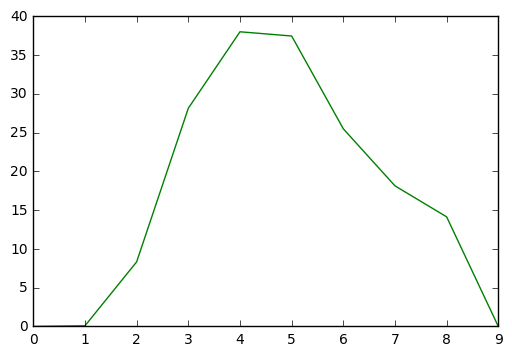

In [7]:
plt.plot(percentageByAge, 'g-')

Jak widać ponad 1/3 osób pomiędzy 40 a 60 rokeim życia zarabia powyżej 50K $

In [8]:
data3 = data.groupby(['race','income']).size()
data3.head(100)

race                income
Amer-Indian-Eskimo  <=50K       275
                    >50K         36
Asian-Pac-Islander  <=50K       763
                    >50K        276
Black               <=50K      2737
                    >50K        387
Other               <=50K       246
                    >50K         25
White               <=50K     20699
                    >50K       7117
dtype: int64

Na tej samej zasadzie co powyżej utworzyliśmy pierwszą funkcję próbującą podawać ostateczną odpowiedź na problem postawiony w naszym zadaniu.
Wybiera ona trzy najbardziej skrajne statystycznie wartości podanej osoby i odpowiada na ich podstawie czy osoba ta zarabia więcej niż 50K $ rocznie. Dodatkowo podaje wyliczone prawdopodobieństwo takiego stanu rzeczy.

In [9]:
import math

def manageChosen(Chosen, current):
    for i in range (0,3):
        #32 to odsetek ludzi przekraczajacych próg, funkcja oszacuje prawd. na jej podstawie
        if (math.fabs(current-32)> math.fabs(Chosen[i]-32) ):
            tmp = Chosen[i]
            Chosen[i] = current
            current=tmp
    return Chosen
       
def isTheirIncomeOver( int_age, str_workclass, str_education, int_education_num, str_marital_status, str_occupation, str_relationship, str_race, str_sex, int_hours_per_week, str_native_country, printProb):
    decision = False
    variableAll =0
    variableOve =0
    variablePer =0
    
    threeChosen = [32,32,32]    
    ####### Przepraszamy za ścianę kodu, próby zebrania poniższych pętli w jedną zakończyły się fiaskiem
    for a in range(0,len(data.age)):
        if  data.age[a] == int_age:
            variableAll+=1
            if str(data.income[a])=='>50K':
                variableOve+=1
    if variableAll != 0:
        variablePer = (variableOve*100)/variableAll     
    else:
        print('Jeden z argumentów nie ma odpowiednika w bazie')
    
    threeChosen= manageChosen(threeChosen, variablePer)

    variableAll =0
    variableOve =0
    variablePer =0
    
    for w in range(0,len(data.workclass)):
        if  data.workclass[w] == str_workclass:
            variableAll+=1
            if str(data.income[w])=='>50K':
                variableOve+=1
    if variableAll != 0:
        variablePer = (variableOve*100)/variableAll           
    else:
        print('Jeden z argumentów nie ma odpowiednika w bazie')
    
    threeChosen= manageChosen(threeChosen, variablePer)

    variableAll =0
    variableOve =0
    variablePer =0
    
    for en in range(0,len(data) ):
        if  data['education.num'][en] == int_education_num:
            variableAll+=1
            if str(data.income[en])=='>50K':
                variableOve+=1
    if variableAll != 0:
          variablePer = (variableOve*100)/variableAll           
    else:
        print('Jeden z argumentów nie ma odpowiednika w bazie')
    
    threeChosen= manageChosen(threeChosen, variablePer)

    variableAll =0
    variableOve =0
    variablePer =0
    
    for e in range(0,len(data.education)):
        if  data.education[e] == str_education:
            variableAll+=1
            if str(data.income[e])=='>50K':
                variableOve+=1
    if variableAll != 0:
        variablePer = (variableOve*100)/variableAll           
    else:
        print('Jeden z argumentów nie ma odpowiednika w bazie')
    
    threeChosen= manageChosen(threeChosen, variablePer)

    variableAll =0
    variableOve =0
    variablePer =0
 
    for m in range(0,len(data['marital.status'])):
        if  data['marital.status'][m] == str_marital_status:
            variableAll+=1
            if str(data.income[m])=='>50K':
                variableOve+=1
    if variableAll != 0:
        variablePer = (variableOve*100)/variableAll           
    else:
        print('Jeden z argumentów nie ma odpowiednika w bazie')
    
    threeChosen= manageChosen(threeChosen, variablePer)

    variableAll =0
    variableOve =0
    variablePer =0
    
    for o in range(0,len(data['occupation'])):
        if  data['occupation'][o] == str_occupation:
            variableAll+=1
            if str(data.income[o])=='>50K':
                variableOve+=1
    if variableAll != 0:
        variablePer = (variableOve*100)/variableAll           
    else:
        print('Jeden z argumentów nie ma odpowiednika w bazie')
    
    threeChosen= manageChosen(threeChosen, variablePer)

    variableAll =0
    variableOve =0
    variablePer =0
    
    for r in range(0,len(data['relationship'])):
        if  data['relationship'][r] == str_relationship:
            variableAll+=1
            if str(data.income[r])=='>50K':
                variableOve+=1
    if variableAll != 0:
        variablePer = (variableOve*100)/variableAll           
    else:
        print('Jeden z argumentów nie ma odpowiednika w bazie')
    
    threeChosen= manageChosen(threeChosen, variablePer)
 
    variableAll =0
    variableOve =0
    variablePer =0
    
    for ra in range(0,len(data['race'])):
        if  data['race'][ra] == str_race:
            variableAll+=1
            if str(data.income[ra])=='>50K':
                variableOve+=1
    if variableAll != 0:
        variablePer = (variableOve*100)/variableAll           
    else:
        print('Jeden z argumentów nie ma odpowiednika w bazie')
    
    threeChosen= manageChosen(threeChosen, variablePer)

    variableAll =0
    variableOve =0
    variablePer =0
    
    for s in range(0,len(data['sex'])):
        if  data['sex'][s] == str_sex:
            variableAll+=1
            if str(data.income[s])=='>50K':
                variableOve+=1
    if variableAll != 0:
        variablePer = (variableOve*100)/variableAll           
    else:
        print('Jeden z argumentów nie ma odpowiednika w bazie')
    
    threeChosen= manageChosen(threeChosen, variablePer)

    variableAll =0
    variableOve =0
    variablePer =0
    
    for h in range(0,len(data['hours.per.week'])):
        if  data['hours.per.week'][h] == int_hours_per_week:
            variableAll+=1
            if str(data.income[h])=='>50K':
                variableOve+=1
    if variableAll != 0:
        variablePer = (variableOve*100)/variableAll           
    else:
        print('Jeden z argumentów nie ma odpowiednika w bazie')
    
    threeChosen= manageChosen(threeChosen, variablePer)

    variableAll =0
    variableOve =0
    variablePer =0
    
    for n in range(0,len(data['native.country'])):
        if  data['native.country'][n] == str_native_country:
            variableAll+=1
            if str(data.income[n])=='>50K':
                variableOve+=1
    if variableAll != 0:
        variablePer = (variableOve*100)/variableAll           
    else:
        print('Jeden z argumentów nie ma odpowiednika w bazie')
    
    threeChosen= manageChosen(threeChosen, variablePer)
    
    variableAll =0
    variableOve =0
    variablePer =0
    
######## Po wybraniu najbardziej skrajnych elementów, na podstawie ich sumy klasyfikujemy osobę do grupy prawdopodobieństwa
    

    pSum = threeChosen[0] + threeChosen[1] +threeChosen[2]
    prob = (pSum/3)
    
    if(pSum > 128):
        if printProb =='Yes':
            print('Prawie pewne - ' + str(prob) )
        decision = True
    elif(pSum > 96):
        if printProb =='Yes':
            print('Bardzo prawdopodobne - '  + str(prob) )
        decision = True
    elif(pSum > 80):
        if printProb =='Yes':
            print('Prawdopodobne - ' + str(prob))
        decision = True
    elif(pSum > 48):
        if printProb =='Yes':
            print('Możliwe - ' + str(prob) )
    elif(pSum > 0):
        if printProb =='Yes':
            print('Prawie niemożliwe - ' + str(prob) )
   
    
    return 'Decyzja algorytmu: ' + str(decision)


isTheirIncomeOver(68,'Federal-gov','HS-grad', 9, 'Divorced', 'Prof-specialty' ,'Not-in-family','White','Female',40,'United-States', 'Yes' )

Prawie niemożliwe - 10.557996533130883


'Decyzja algorytmu: False'

Jak widać wybrany rekord nie przekroczył progu, którego oczekiwał algorytm i jest oceniony na osobę nie zarabiającą powyżej 50K $ Potwierdza to rzeczywistość, bo zbiór danych określa przychód tej osoby na poniżej progu. Sprawdzmy osobę go przekraczającą:
    

In [10]:
isTheirIncomeOver(43,"Private", "Masters",14,"Divorced","Exec-managerial","Unmarried","White","Female",40,"United-States",'No')

'Decyzja algorytmu: True'

I tym razem algorytm pokrył się z prawdą. Sprawdzmy teraz skuteczność funkcji na większesz części naszej bazy.


In [12]:
funcResult = []
actualResult = []
#Uwaga: nie przesadzać z zakresem, wolno się wykonywuje
rangeMin = 4010
rangeMax = 4031
for i in range (rangeMin, rangeMax):
    funcResult.append(isTheirIncomeOver(data['age'][i],data['workclass'][i],data['education'][i],data['education.num'][i],data['marital.status'][i],data['occupation'][i],data['relationship'][i],data['race'][i],data['sex'][i],data['hours.per.week'][i],data['native.country'][i], 'No'))

for i in range (rangeMin, rangeMax):
    if data.income[i] == '>50K':
        actualResult.append('Decyzja algorytmu: True')
        
    else:
        actualResult.append('Decyzja algorytmu: False')
correctCounter = 0
for i in range (0, rangeMax-rangeMin):
    if funcResult[i]== actualResult[i]:
        correctCounter+=1

print('Poprawność = ' + str( (correctCounter/(rangeMax- rangeMin ) ) *100 ) + '%' )


Poprawność = 95.23809523809523%


Algorytm ma około ~80% skuteczności co uznajemy za satysfakcjonujący wynik tego eksperymentalnego pomysłu. 

# KNN

In [69]:
dummies = pd.get_dummies(data)
dummies.head(10)

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,...,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,income_<=50K,income_>50K
0,90,77053,9,0,4356,40,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,82,132870,9,0,4356,18,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,66,186061,10,0,4356,40,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,54,140359,4,0,3900,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,41,264663,10,0,3900,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,34,216864,9,0,3770,45,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6,38,150601,6,0,3770,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7,74,88638,16,0,3683,20,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8,68,422013,9,0,3683,40,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,41,70037,10,0,3004,60,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [120]:
columns = list(dummies.columns.values)
columns.remove("income_<=50K")
columns.remove("income_>50K")
columns.remove('fnlwgt')
columns.remove('capital.gain')
columns.remove('capital.loss')
trainMin = 30000
trainMax = 32000

chosen = 45

n=5

lowestDist = []
lowestIds = []
for j in range (0,n):
    lowestIds.append(0)
    lowestDist.append(math.inf)

#eucDistances = []

value = 0
for i in  range (trainMin, trainMax):
    for k in columns:
        value+=(dummies[k][i] - dummies[k][chosen]) ** 2
    currentD = math.sqrt(value)
    #eucDistances.append(currentD)
   
    for j in range (0,n):
        
        if (currentD <  lowestDist[j] and i not in lowestIds):
            tmpD = lowestDist[j]
            lowestDist[j] = currentD
            currentD=lowestDist[j]
            
            tmpId = lowestIds[j]
            lowestIds[j] = i
            i=lowestIds[j]
    
    
    value = 0
    
counter =0
for l in range (0, len(lowestIds)):
    print(data['income'][l])
    if data['income'][l] =='>50K':        
        counter+=1
if counter>= n/2:
    print("Decided: >50K")
else:
    print("Decided: <=50K")

print('Given:' + data['income'][chosen])



<=50K
<=50K
<=50K
<=50K
<=50K
Decided: <=50K
Given:>50K
